# PART 1:


Create a graph function that takes any dataset and create a boxplot and a histogram for numerical variables and a barplot for categorical variables and save them as PNG files in a specified repository. If no repository is specified then by default the graphs get stored in the working directory. The functions also give an additional argument to the user to choose a list of columns. If no list of columns is given the default setting must choose all the columns of the dataset.

### Problem Statement:

#### What?

For data analysis, plotting graphs of any kind in python consumes ample amount of time before actually studying the data. 

The task is to create an user defined function which will plot the graphs (Histogram & Boxplot for numeric columns, Bar plot for categorical columns) of any kind and any number of columns in the dataset and store the graphs as an image file in the required directory. 

#### Why?

As an analyst, solving this problem will help us minimize the time spent to plot simple graphs of the data under analysis.
Another important advantage of creating this function is to understand the variables thoroughly and do a descriptive study on them viz,. understanding their distribution, presence of outliers, etc,.

This function which plots such graphs of the input data will give us more time to do the other important things in machine learning or model creation pipleine. 

#### How?

* Generate a function **Graphs(dataframe, columns, directory)**
* Check how many columns are specified by the user in the function and read those columns present in the dataframe. By   default, read all the columns.
* Remove the S.No column, if any,present in the dataset using the if statement.
* Boxplot will not be plotted with the presence of null values. Hence **remove the null values** present in any column of the dataset.
* Differentiate between numerical and categorical variables using **select_dtypes** method from pandas.
    * Columns having object dtypes are put in categorical variables
    * All other columns are put in numerical variables
* Categorical variables which are in number format present in numerical variable dataframe are seperated using the conditions:
    * **data type** of the variable should **Not be FLOAT**. 
    * **variance** of such variables will be less than 20.
    * **number of unique values** in those variables will be less than 8% of length of the dataframe under consideration.
    * Then these seperated variables are merged with the object categorical variables(created in the previous step).
* Plot horizontal box-plot on top of the histogram for all numerical variables.
* Plot bar plot for all categorical variables.
* Save all the graphs as an image file(PNG format) in the user defined directory. By default, save it in the current working directory. The file names of the images should be the name of the columns.


#### Expected Output:

The expected outputs are as many image files as there are columns specified by the user and all the files are to be saved in a single location.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import os

In [2]:
cars = pd.read_csv('cars.csv') #reading the data

In [3]:
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [4]:
cars.shape

(406, 9)

In [5]:
if cars.iloc[:,0].max() == len(cars): #if the first column is serial number remove it
    cars = cars.iloc[:,1:]

In [6]:
cars.dtypes #dtype of all variables

Car              object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Model             int64
Origin           object
dtype: object

In [7]:
catg = cars.select_dtypes('object') #selecting only variables of object dtype 
catg

,Car,Origin
0,Chevrolet Chevelle Malibu,US
1,Buick Skylark 320,US
2,Plymouth Satellite,US
3,AMC Rebel SST,US
4,Ford Torino,US
...,...,...
401,Ford Mustang GL,US
402,Volkswagen Pickup,Europe
403,Dodge Rampage,US
404,Ford Ranger,US


In [8]:
num = cars.select_dtypes(exclude='object') #excluding variables of object dtype storing it in a variable

In [9]:
num

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
401,27.0,4,140.0,86,2790,15.6,82
402,44.0,4,97.0,52,2130,24.6,82
403,32.0,4,135.0,84,2295,11.6,82
404,28.0,4,120.0,79,2625,18.6,82


In [10]:
num.nunique() #finding the number of unique values in the object excluded dataframe

MPG             130
Cylinders         5
Displacement     83
Horsepower       94
Weight          356
Acceleration     96
Model            13
dtype: int64

In [11]:
catg_check =( (num.dtypes!=float) 
             & (num.var() < 20) 
             & (num.nunique() < 0.08*len(cars))) #condition to check which variables(dtype=other than float) 
                                                #has variance less than 20 and the number of unique values
                                                #in that variable is less than 8% of length of the dataframe
catg_check

MPG             False
Cylinders        True
Displacement    False
Horsepower      False
Weight          False
Acceleration    False
Model            True
dtype: bool

In [12]:
a = catg_check[catg_check].index #retreiving the index of such variables. 
                                 #These variable are those whose dtype is int but they are categorical in nature
a

Index(['Cylinders', 'Model'], dtype='object')

In [13]:
a = cars[a] #storing those categorical variables in a new dataframe

In [14]:
a #categorical variables whose dtype is int

,Cylinders,Model
0,8,70
1,8,70
2,8,70
3,8,70
4,8,70
...,...,...
401,4,82
402,4,82
403,4,82
404,4,82


In [15]:
catg #categorical variables whose dtype is object

,Car,Origin
0,Chevrolet Chevelle Malibu,US
1,Buick Skylark 320,US
2,Plymouth Satellite,US
3,AMC Rebel SST,US
4,Ford Torino,US
...,...,...
401,Ford Mustang GL,US
402,Volkswagen Pickup,Europe
403,Dodge Rampage,US
404,Ford Ranger,US


In [16]:
catg = pd.concat([catg,a],axis=1) #concatenating both the dataframes into a single dataframe

In [17]:
catg #dataframe having pure categorical variables

,Car,Origin,Cylinders,Model
0,Chevrolet Chevelle Malibu,US,8,70
1,Buick Skylark 320,US,8,70
2,Plymouth Satellite,US,8,70
3,AMC Rebel SST,US,8,70
4,Ford Torino,US,8,70
...,...,...,...,...
401,Ford Mustang GL,US,4,82
402,Volkswagen Pickup,Europe,4,82
403,Dodge Rampage,US,4,82
404,Ford Ranger,US,4,82


In [18]:
num = num.drop(columns=a) #dropping the categorical variables from the numerical variables dataframe

In [19]:
num #dataframe having pure numerical variables

,MPG,Displacement,Horsepower,Weight,Acceleration
0,18.0,307.0,130,3504,12.0
1,15.0,350.0,165,3693,11.5
2,18.0,318.0,150,3436,11.0
3,16.0,304.0,150,3433,12.0
4,17.0,302.0,140,3449,10.5
...,...,...,...,...,...
401,27.0,140.0,86,2790,15.6
402,44.0,97.0,52,2130,24.6
403,32.0,135.0,84,2295,11.6
404,28.0,120.0,79,2625,18.6


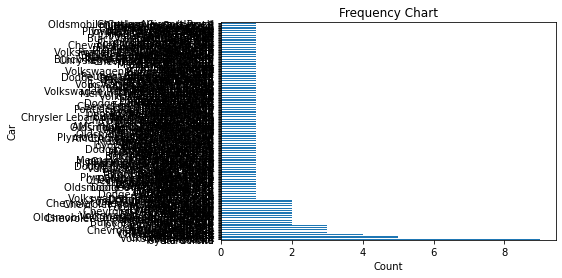

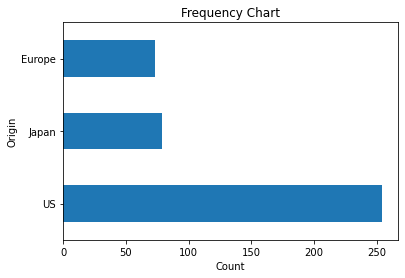

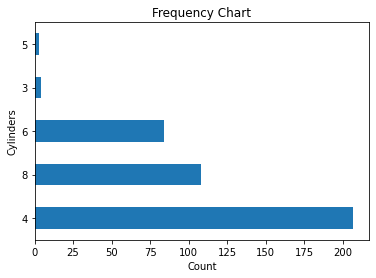

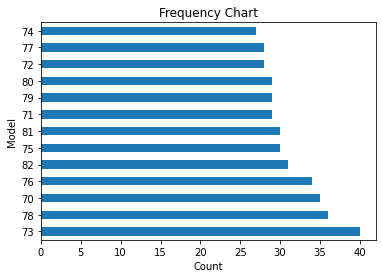

In [20]:
#bar plot for all categorical variables
for i in range(0,catg.shape[1]):
    catg.iloc[:,i].value_counts().plot(kind='barh')
    plt.ylabel(catg.columns[i])
    plt.xlabel('Count')
    plt.title('Frequency Chart')
    plt.show()

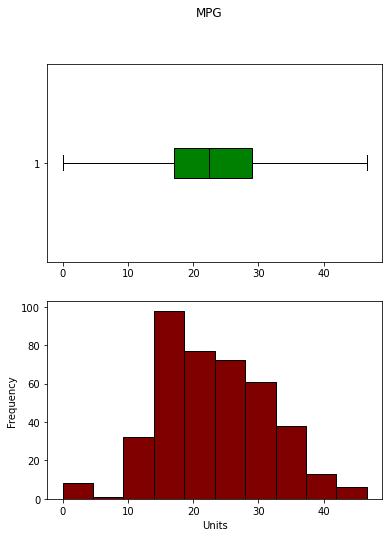

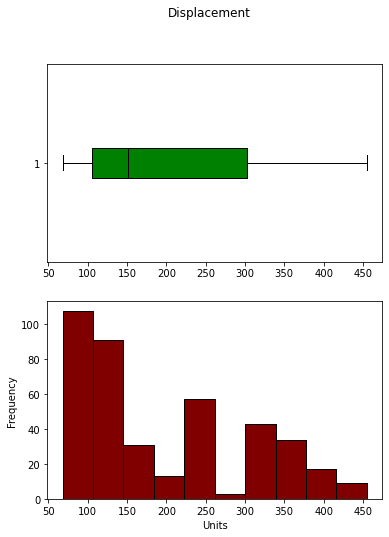

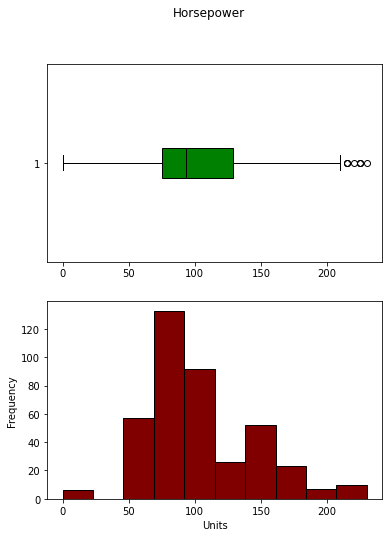

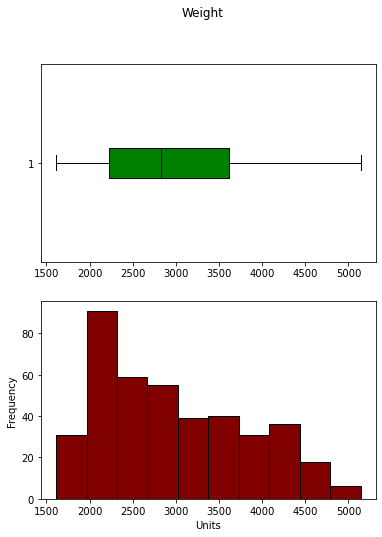

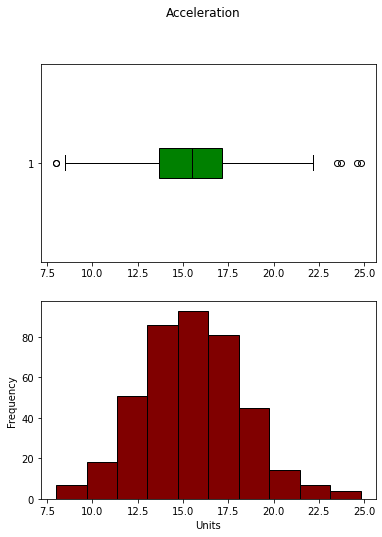

In [21]:
#boxplot and histogram for all numerical variables
for i in range(0,num.shape[1]):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.suptitle(num.columns[i])
    ax1.boxplot(num.iloc[:,i],vert=False,patch_artist=True,boxprops = dict(facecolor='green'),
               medianprops = dict(color='black'))
    #ax1.set_xlabel('Units')
    #ax1.set_ylabel(cars.columns[i])
    ax2.hist(num.iloc[:,i],color='maroon',edgecolor='black')
    ax2.set_xlabel('Units')
    ax2.set_ylabel('Frequency')
    fig.set_figheight(8)
    fig.set_figwidth(6)
    #plt.savefig(str(num.columns[i])+'.png')
    plt.show()


In [22]:
def graphs(df,cols=[],directory=os.getcwd()):        #function is defined with default value for directory
    length=len(df)                                   #length of the dataframe is stored in a variable
    cwd = os.getcwd()                                #current working directory is stored in a variable
    os.chdir(directory)                              #if the user gives a directory, the same is changed
    if len(cols) != 0:                               #if the user specifies the number of columns, this statement is executed
        df = df[cols]                                #only the specified columns are considered in the dataframe
    if df.iloc[:,0].max() == len(df):                #if the first column is a serial number
        df = df.iloc[:,1:]                           #we remove it
    for i in range(0,df.shape[1]):                   #for the entire dataframe
        if df.iloc[:,i].isnull().sum() > 0:          #if there are null values present in any column
            df = df.dropna(subset=[df.columns[i]])   #we remove it as boxplot can't be plotted for such columns with null values
    catg_df = df.select_dtypes('object')             #variables with object dtypes are set as categorical variables dataframe
    num_df = df.select_dtypes(exclude='object')      #variables which are NOT object dtypes are set as numerical variables dataframe
    catg_check = ((num_df.dtypes!=float) & (num_df.var() < 20) & (num_df.nunique() < 0.08*(length))) #numerical variables which are not of float dtype, has variance less than 20 and unique values less than 8% of the length of dataframe is retrieved 
    a = catg_check[catg_check].index                 #The index of such variables are stored as an array
    a = df[a]                                        #dataframe is created with such variables
    catg_df = pd.concat([catg_df,a],axis=1)          #we are merging the newly created categorial dataframe and earlier created object dataframe together
    num_df = num_df.drop(columns=a)                  #dropping the categorical variable(dtype=int) from the numerical variable dataframe
    if len(catg_df) > 0:                             #if the user input data has categorical values
        for i in range(0,catg_df.shape[1]):          #for all categorical variables
            if catg_df.iloc[:,i].nunique() > 100:    #if the number of unique values in that variable is more than 100
                catg_df.iloc[:,i].value_counts().plot(kind='barh',figsize=(25,100),color='maroon') #such large sized graph is plotted
            else:                                    #if the number of unique values in that variable is less than or equal to 100
                catg_df.iloc[:,i].value_counts().plot(kind='barh',figsize=(8,6),color='maroon')    #such regular sized graph is plotted
            plt.ylabel(catg_df.columns[i],fontsize=16)     #setting y-axis labels and fontsize
            plt.xlabel('Count',fontsize=16)                #setting x-axis labels and fontsize
            plt.title('Frequency Chart',fontsize=18)       #setting title name and fontsize
            plt.savefig(str(catg_df.columns[i])+'.png')    #we are saving the graph as an image in png format(file name - name of categorical variable)
            plt.show()                                     #displaying the graph as an output
    if len(num_df) > 0:                                    #if the user input data has numerical values
        for i in range(0,num_df.shape[1]):                 #for all numerical variables
            fig, (ax1, ax2) = plt.subplots(2, 1)           #subplot method is called to plot two graphs at the same time
            fig.suptitle(num_df.columns[i],fontsize=20)    #setting title name and fontsize
            ax1.boxplot(num_df.iloc[:,i],vert=False,patch_artist=True,boxprops = dict(facecolor='green'),
               medianprops = dict(color='black'))          #boxplot is plotted on the top
            ax2.hist(num_df.iloc[:,i],color='maroon',edgecolor='black') #histogram is plotted below the boxplot
            ax2.set_xlabel('Units',fontsize=14)            #setting x-axis labels and fontsize
            ax2.set_ylabel('Frequency',fontsize=14)        #setting x-axis labels and fontsize
            fig.set_figheight(10)                          #setting the graph height
            fig.set_figwidth(8)                            #setting the graph width
            plt.savefig(str(num_df.columns[i])+'.png')     #we are saving the graph as an image in png format(file name - name of numerical variable)
            plt.show()                                     #displaying the graph as an output
    os.chdir(cwd)                                          #changing the directory to current working directory

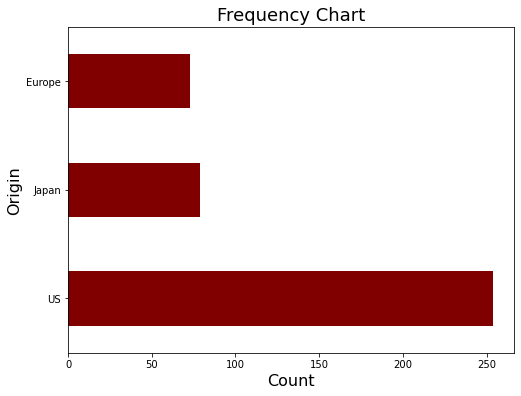

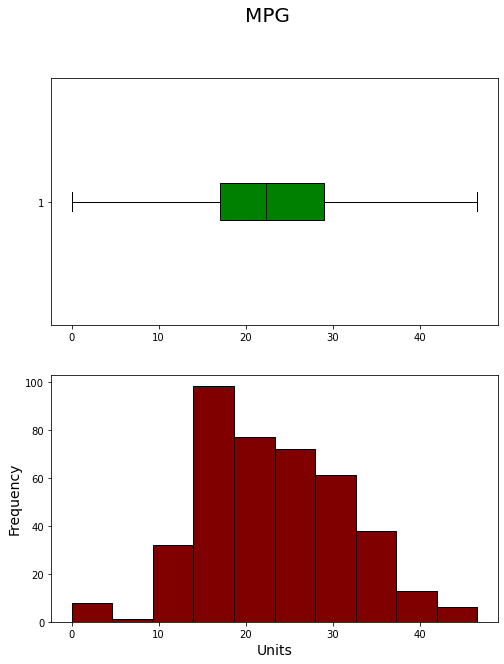

In [24]:
a = ['MPG','Origin']  #specifying the columns
dire = r'D:\DS'       #specifying the directory
graphs(cars,a,dire)           #executing the created function

In [25]:
iris = pd.read_csv('iris.csv')

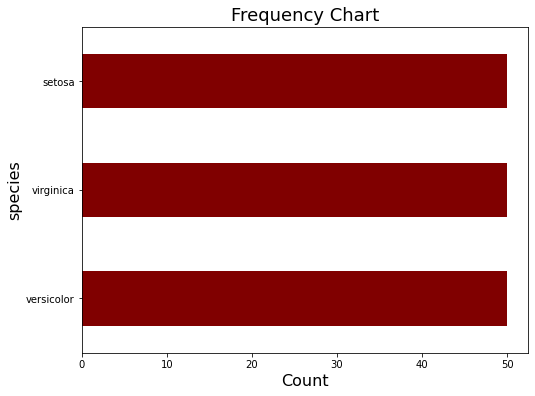

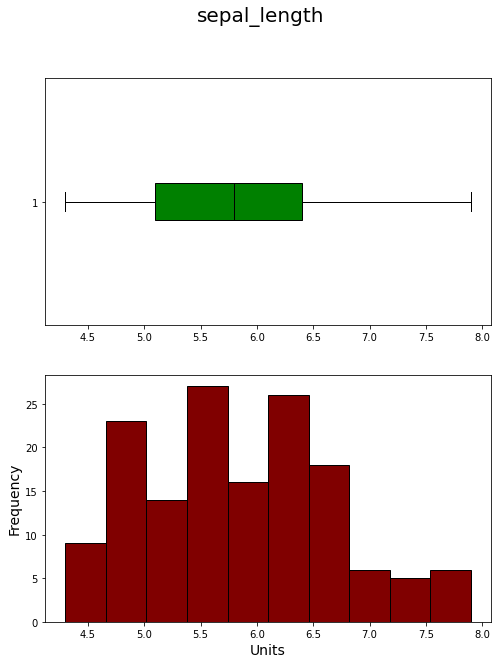

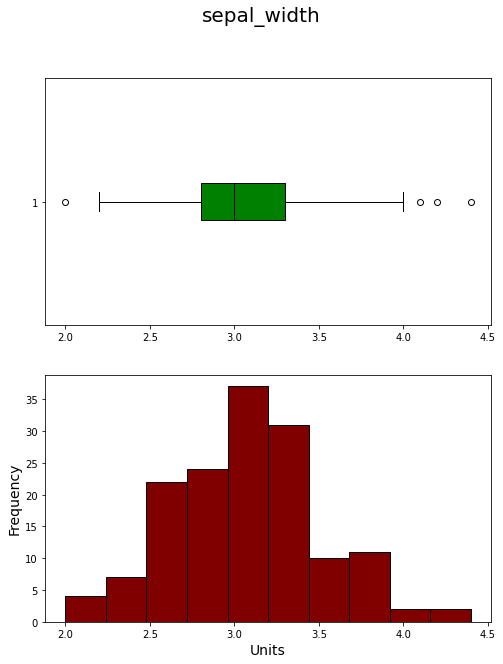

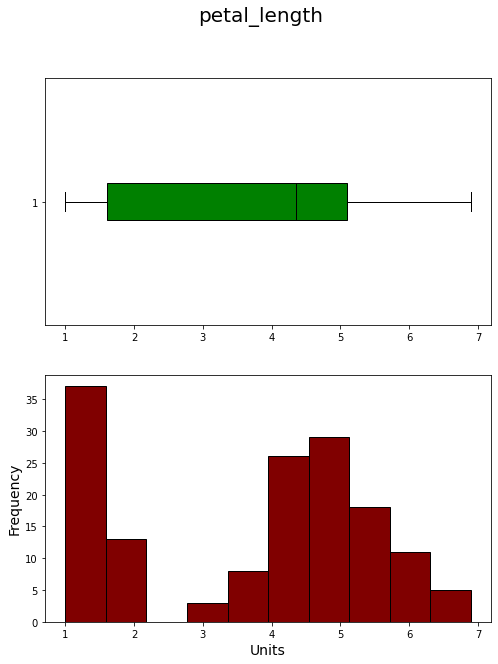

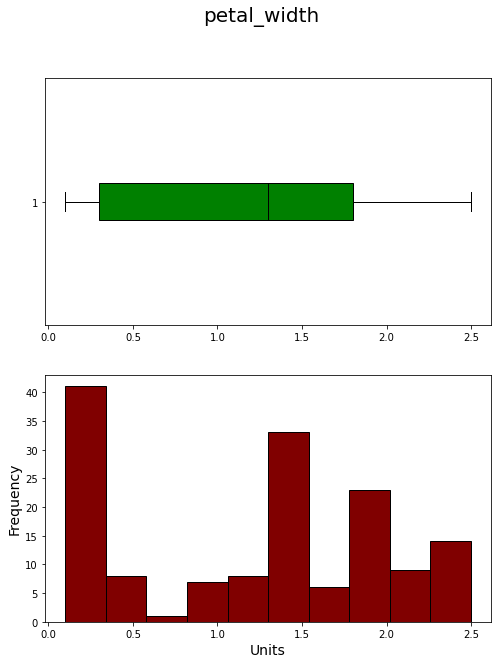

In [26]:
graphs(iris)

In [27]:
telco = pd.read_excel('telco.xls')

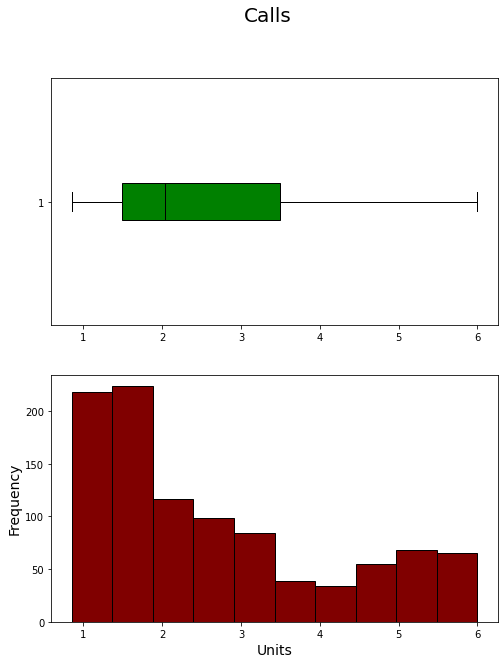

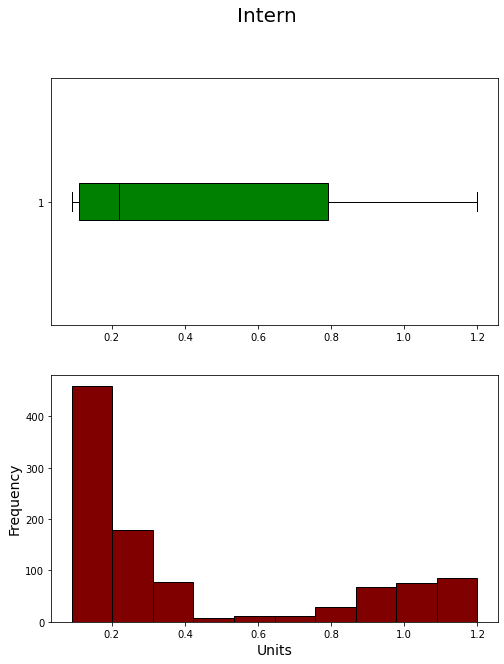

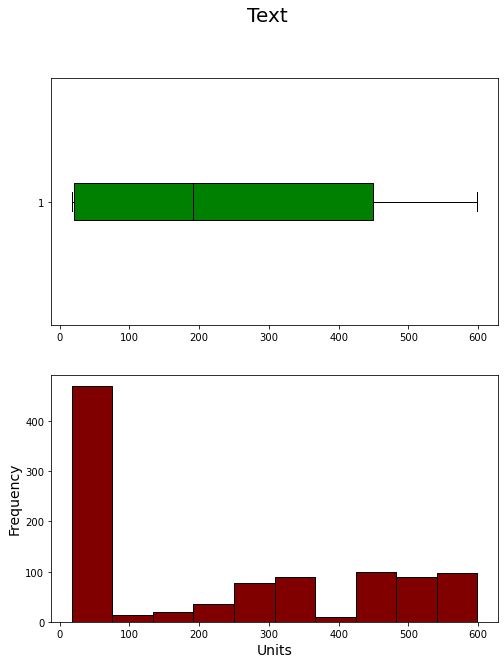

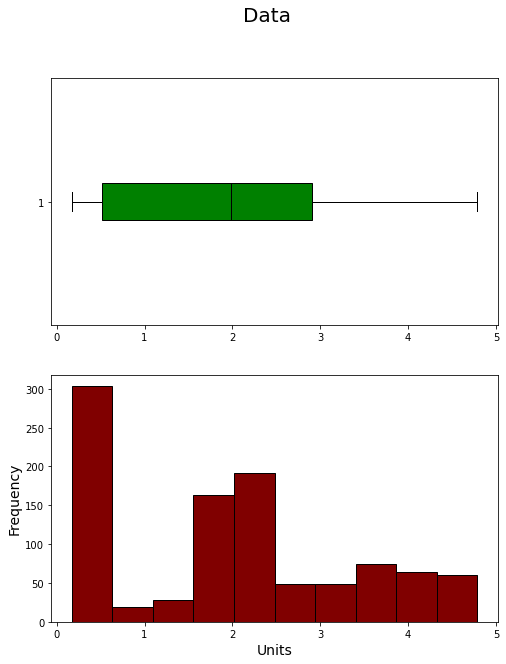

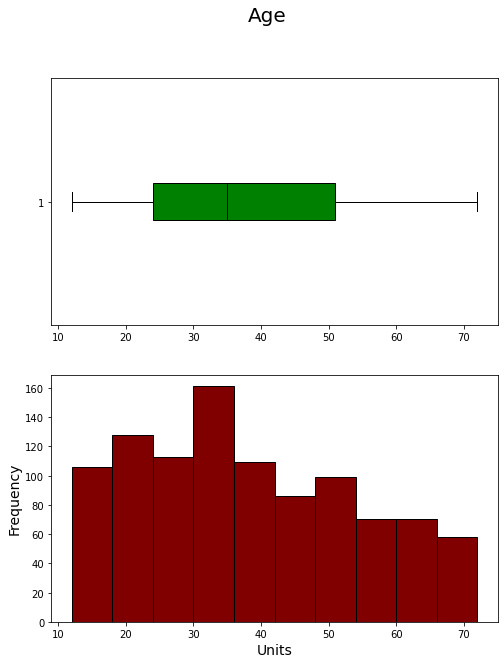

In [28]:
graphs(telco)

In [ ]:
'''
os.chdir(r'D:\DS\Praxis\Study Material\Dataset')
walmart = pd.read_csv('Walmart_Store_sales.csv')
os.chdir(r'D:\DS\Python\Praxis\PY')
'''